In [1]:
from sklearn import  datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()

In [2]:
x=iris.data   # data that contains 4 features of 150 samples. 
y=iris.target # labels with ground truth information

# split the data into split% training and (100-split)% testing
split = 0.9

In [3]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=split)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [4]:
mxdepth = 1
classifier1 = DecisionTreeClassifier(max_depth=mxdepth)
classifier1.fit(x_train,y_train)
predictions=classifier1.predict(x_test)
print(f"DTC ({mxdepth}) = %0.2f accuracy" % accuracy_score(y_test,predictions))

DTC (1) = 0.65 accuracy


In [5]:
k = 1
classifier2 = KNeighborsClassifier(n_neighbors=k)
classifier2.fit(x_train,y_train)
predictions=classifier2.predict(x_test)
print(f"KNN ({k}) = %0.2f accuracy" % accuracy_score(y_test,predictions))

KNN (1) = 0.93 accuracy


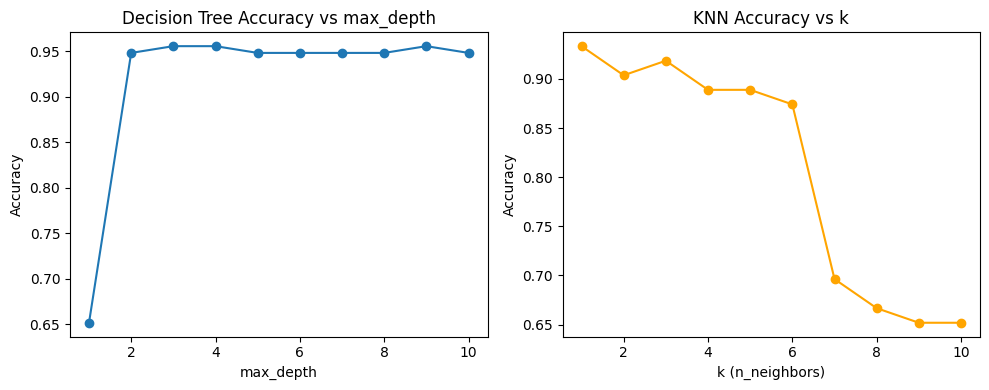

In [6]:
import matplotlib.pyplot as plt

# Decision Tree: Varying max_depth
dtc_accuracies = []
depths = range(1, 11)
for d in depths:
    clf = DecisionTreeClassifier(max_depth=d)
    clf.fit(x_train, y_train)
    preds = clf.predict(x_test)
    acc = accuracy_score(y_test, preds)
    dtc_accuracies.append(acc)

# KNN: Varying k
knn_accuracies = []
ks = range(1, 11)
for k_val in ks:
    clf = KNeighborsClassifier(n_neighbors=k_val)
    clf.fit(x_train, y_train)
    preds = clf.predict(x_test)
    acc = accuracy_score(y_test, preds)
    knn_accuracies.append(acc)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(depths, dtc_accuracies, marker='o')
plt.title('Decision Tree Accuracy vs max_depth')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(ks, knn_accuracies, marker='o', color='orange')
plt.title('KNN Accuracy vs k')
plt.xlabel('k (n_neighbors)')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

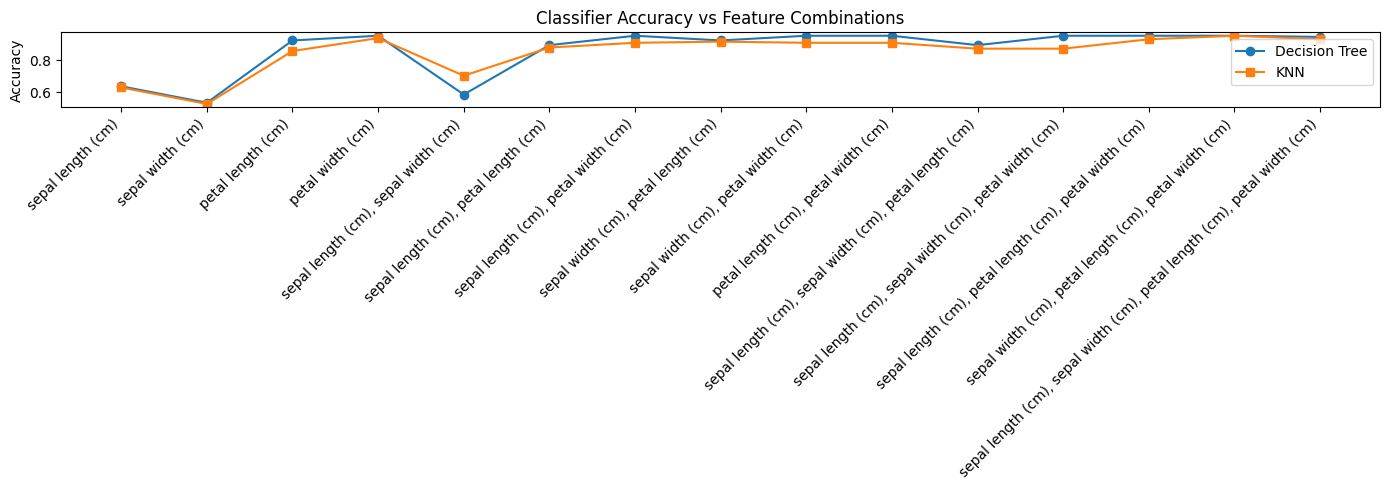

Analysis:
The results show that not all feature combinations yield the same accuracy. Sometimes, using fewer features can result in better performance due to the 'curse of dimensionality', where adding irrelevant or redundant features can degrade model accuracy. The best feature set is not always the one with all features.


In [7]:
from itertools import combinations

# Feature names and their indices
feature_names = iris.feature_names
feature_indices = list(range(len(feature_names)))

# Best parameters from Problem #1
best_dtc_depth = depths[dtc_accuracies.index(max(dtc_accuracies))]
best_knn_k = ks[knn_accuracies.index(max(knn_accuracies))]

dtc_results = []
knn_results = []
comb_labels = []

for r in range(1, 5):
    for comb in combinations(feature_indices, r):
        # Select features
        x_train_sub = x_train[:, comb]
        x_test_sub = x_test[:, comb]
        label = ', '.join([feature_names[i] for i in comb])
        comb_labels.append(label)
        
        # Decision Tree
        dtc = DecisionTreeClassifier(max_depth=best_dtc_depth)
        dtc.fit(x_train_sub, y_train)
        dtc_pred = dtc.predict(x_test_sub)
        dtc_acc = accuracy_score(y_test, dtc_pred)
        dtc_results.append(dtc_acc)
        
        # KNN
        knn = KNeighborsClassifier(n_neighbors=best_knn_k)
        knn.fit(x_train_sub, y_train)
        knn_pred = knn.predict(x_test_sub)
        knn_acc = accuracy_score(y_test, knn_pred)
        knn_results.append(knn_acc)

plt.figure(figsize=(14, 5))
plt.plot(comb_labels, dtc_results, marker='o', label='Decision Tree')
plt.plot(comb_labels, knn_results, marker='s', label='KNN')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Accuracy')
plt.title('Classifier Accuracy vs Feature Combinations')
plt.legend()
plt.tight_layout()
plt.show()

# Analysis
print("Analysis:")
print("The results show that not all feature combinations yield the same accuracy. Sometimes, using fewer features can result in better performance due to the 'curse of dimensionality', where adding irrelevant or redundant features can degrade model accuracy. The best feature set is not always the one with all features.")

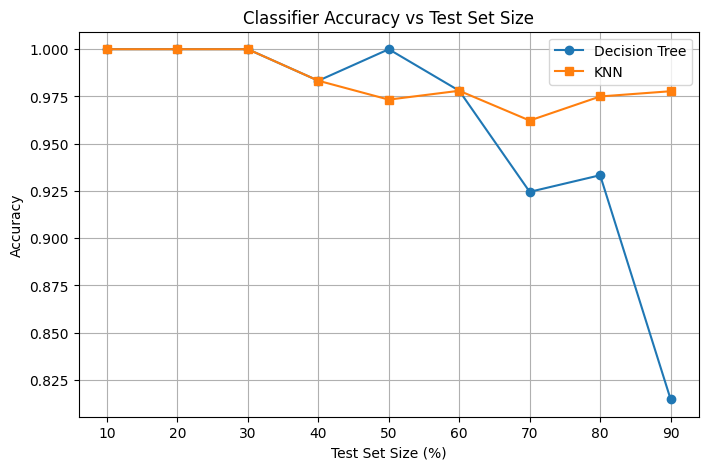

Analysis:
As the test set size increases (and training set size decreases), the accuracy of both classifiers generally decreases. This is expected because with less training data, the models have less information to learn from, leading to reduced performance. The trend may not be strictly monotonic due to the randomness in train/test splits, but the overall pattern is clear: more training data usually leads to better model performance.


In [8]:
# We'll use the best feature set (all features) and best parameters found earlier
test_sizes = [0.1 * i for i in range(1, 10)]
dtc_scores = []
knn_scores = []

for test_size in test_sizes:
    # Split the data
    x_tr, x_te, y_tr, y_te = train_test_split(
        x[:, :], y, test_size=test_size, random_state=42
    )
    # Decision Tree
    dtc = DecisionTreeClassifier(max_depth=best_dtc_depth)
    dtc.fit(x_tr, y_tr)
    dtc_pred = dtc.predict(x_te)
    dtc_scores.append(accuracy_score(y_te, dtc_pred))
    # KNN
    knn = KNeighborsClassifier(n_neighbors=best_knn_k)
    knn.fit(x_tr, y_tr)
    knn_pred = knn.predict(x_te)
    knn_scores.append(accuracy_score(y_te, knn_pred))

plt.figure(figsize=(8, 5))
plt.plot([int(ts * 100) for ts in test_sizes], dtc_scores, marker='o', label='Decision Tree')
plt.plot([int(ts * 100) for ts in test_sizes], knn_scores, marker='s', label='KNN')
plt.xlabel('Test Set Size (%)')
plt.ylabel('Accuracy')
plt.title('Classifier Accuracy vs Test Set Size')
plt.legend()
plt.grid(True)
plt.show()

print("Analysis:")
print("As the test set size increases (and training set size decreases), the accuracy of both classifiers generally decreases. This is expected because with less training data, the models have less information to learn from, leading to reduced performance. The trend may not be strictly monotonic due to the randomness in train/test splits, but the overall pattern is clear: more training data usually leads to better model performance.")